In [6]:
import os 
import tarfile 
import urllib
import certifi
import ssl

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    ssl._create_default_https_context = ssl._create_unverified_context

    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [11]:
#don't fetch again if file already present
fetch_housing_data()

In [7]:
import pandas as pd 

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The *hist()* method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter's magic command *%matplotlib inline*. This tells Jupyter to set up matplotlib so it uses Jupyter's own backend. Plots are then rendered within the notebook itself. Note that calling *show()* is **optional** in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

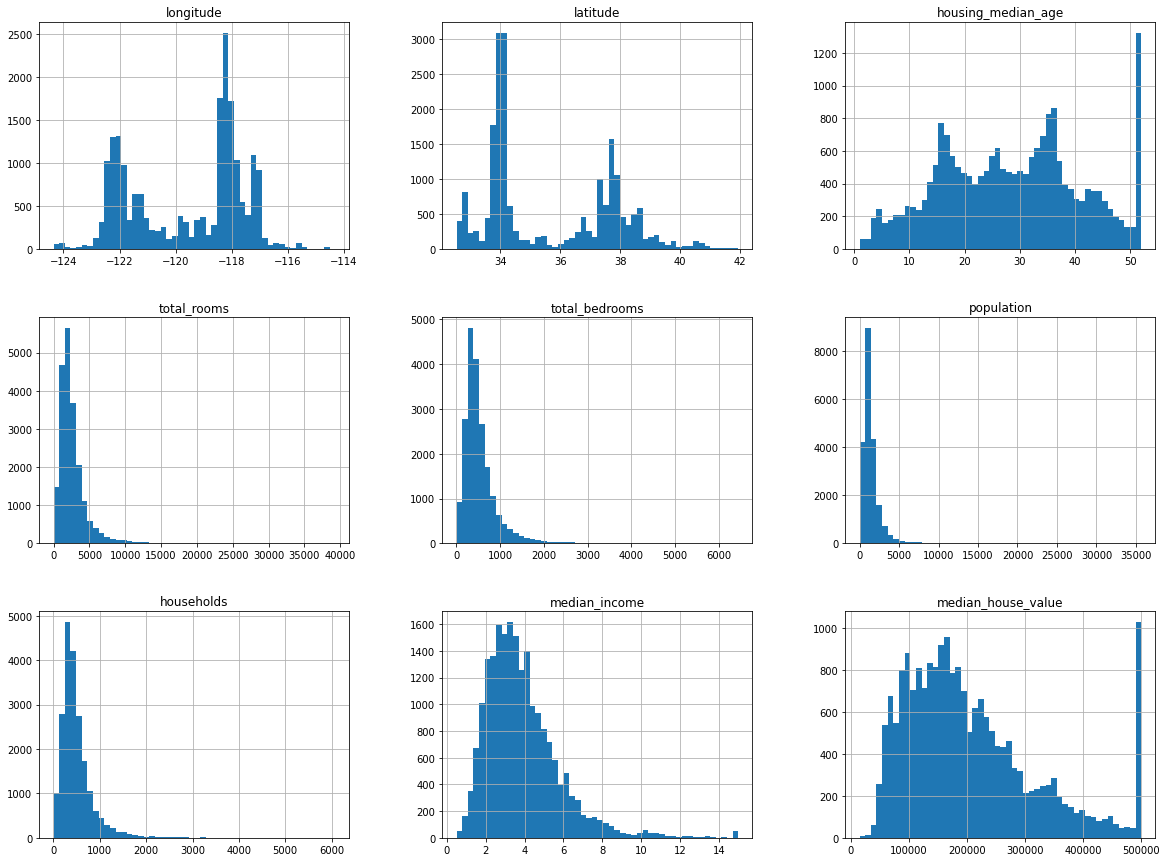

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np

np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Scikit-lEarn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is *train_test_split()*, which does pretty much the same thing as the function above, witha couple of additional features. First, there is a *random_state* parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a seperate DataFrame for labels.

```
    from sklearn.model_selection import train_test_split
    train_set, test_set = train_test_split(dataframe, test_size = 0.2, random_state=42)
```

In [14]:
train_set, test_set = split_train_test(df, 0.2)

In [15]:
print(len(train_set))
print(len(test_set))

16512
4128


<AxesSubplot:>

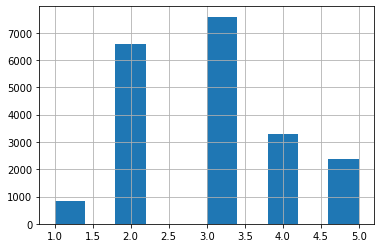

In [16]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0., 1.5, 3.0, 4.6, 6., np.inf], labels = [1, 2, 3, 4, 5])
df["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.367490
2    0.318798
4    0.159399
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
#removing the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [20]:
#creating a copy of the train set for exploration
housing = strat_train_set.copy()

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,182100.0,<1H OCEAN
11274,-117.99,33.78,19.0,7399.0,1698.0,3554.0,1593.0,3.1049,173900.0,<1H OCEAN
16581,-121.43,37.76,7.0,2125.0,508.0,1358.0,464.0,3.6312,147600.0,INLAND
2659,-123.84,40.28,28.0,2809.0,605.0,1093.0,438.0,2.0962,74000.0,<1H OCEAN
11053,-117.85,33.78,23.0,3187.0,870.0,1977.0,852.0,3.3939,212100.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

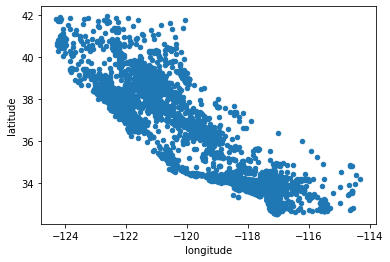

In [22]:
housing.plot(kind = "scatter", x="longitude", y="latitude")

The above plot is a geographical scatterplot of the data. It looks like California but it is hard to see any particular pattern. So we set **alpha=0.1** to make it much easier to visualize the places where there is a **high density** of data points. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

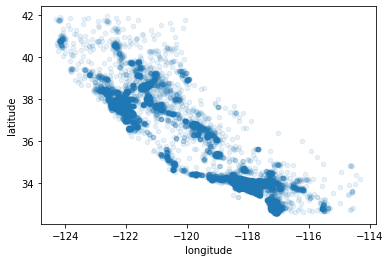

In [23]:
housing.plot(kind = "scatter", x="longitude", y="latitude", alpha =0.1)

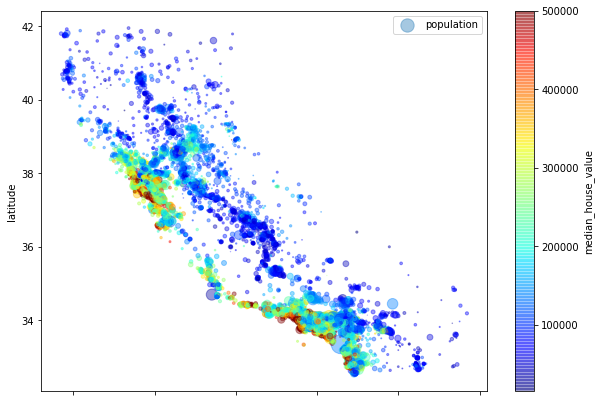

In [24]:
housing.plot(kind = "scatter", x="longitude", y="latitude", alpha = 0.4, s=housing["population"]/100, label = "population",
            figsize = (10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In the above plot - the radius of each circle represents the district's population (option s), and the color represents the price (option c). We use a predefined color map (option cmap_ called *jet*, which ranges from blue (low values) to red (high values)

In [25]:
#Computing the standard correlation coefficient (also called Pearson's r) between every pair of attributes 
#using the corr() method

corr_matrix = housing.corr()

In [26]:
# looking at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690931
total_rooms           0.131721
housing_median_age    0.109157
households            0.062866
total_bedrooms        0.046003
population           -0.026658
longitude            -0.053456
latitude             -0.136914
Name: median_house_value, dtype: float64

We can also check for correlation between attributes using the pandas **scatter_matrix()** funciton, which plots every numerical attribute against every other numerical arrtibute. Since there are 11 numerical attributes here, we could get 11^2 = 121 plots, which would not fit on a page. So let's just focues on a few promising attributes that seem the most correlated with the median housing value:

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

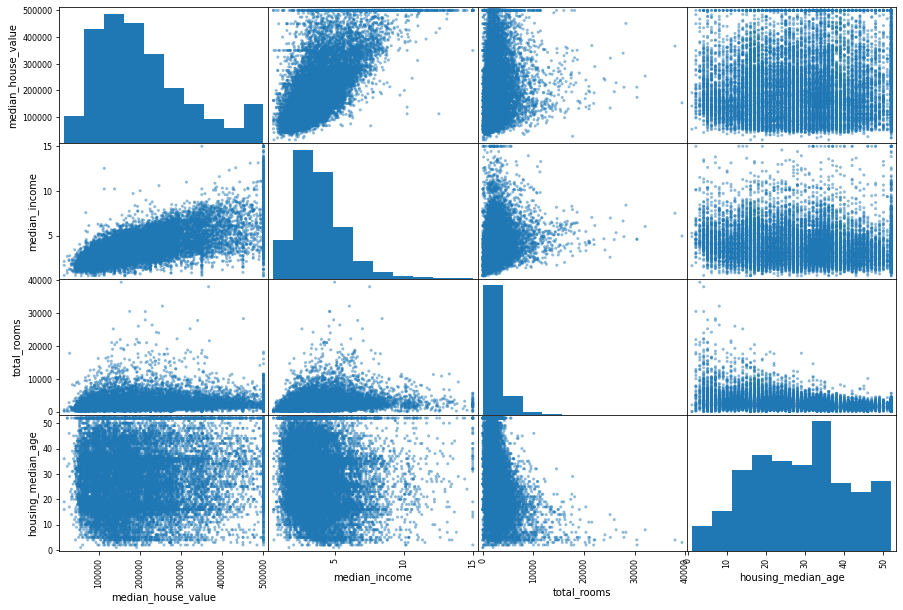

In [27]:
from pandas .plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (15, 10))

We can see in the above plots that the most promising attribute to predict the median house value is the median income.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

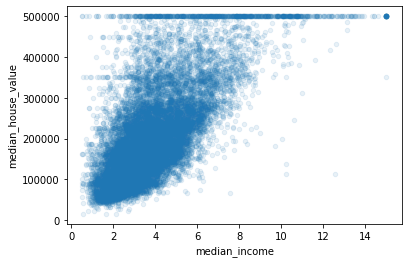

In [28]:
housing.plot(kind="scatter",x="median_income", y="median_house_value", alpha = 0.1)

In [29]:
#experimenting with combination of attributes
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690931
rooms_per_household         0.146786
total_rooms                 0.131721
housing_median_age          0.109157
households                  0.062866
total_bedrooms              0.046003
population_per_household   -0.022046
population                 -0.026658
longitude                  -0.053456
latitude                   -0.136914
bedrooms_per_room          -0.265794
Name: median_house_value, dtype: float64

We can note from above that the new *bedrooms_per_room* attribute is much more correlated with the median house value than the *total_rooms/bedrooms*. Apparently, houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district. 

In [31]:
#reverting a clean training set and dropping predictors and target values to prepare for ML algorithms
housing=strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

#fixing missing values in total_bedrooms attribute: 

We have three options:
1. Get rid of the corresponding district:
   ` housing.dropna(subset=["total_bedrooms"])`
2. Get rid of the whole attribute: `housing.drop("total_bedrooms", axis =1)`
3. Set the values to some value (zero, the mean, the median, etc.):
    ```
    median = housing["total_bedrooms"].median()
    housing["total_bedrooms"].fillna(median, inplace = True)
    ```
    For option 3, we need to save the median value so that we can use it later to replace missing values in the test set and later in new data, once the system goes live. 

Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**. 

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [33]:
#since the median can only be computed for numerical values, we create a copy of the data without the text attributes:
housing_num = housing.drop("ocean_proximity", axis =1)

In [34]:
#fitting the imputer instance to the training data using fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
#the result of the imputer is stored in its statistics_ instance variable
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2124.    ,  433.    , 1167.    ,
        409.    ,    3.5341])

In [36]:
#comparing it with the median values:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2124.    ,  433.    , 1167.    ,
        409.    ,    3.5341])

In this project, only the *total_bedrooms* attribute had missing values, but we cannot be sure that there won't be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes. 

In [37]:
X=imputer.transform(housing_num)# will output a NumPy array containing the transformed features

In [38]:
#converting it to a dataframe:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

In [39]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 20449 to 15661
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Now lets look at our categorical variable *ocean_proximity*:

In [40]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(15)

,ocean_proximity
20449,<1H OCEAN
11274,<1H OCEAN
16581,INLAND
2659,<1H OCEAN
11053,<1H OCEAN
7183,<1H OCEAN
13346,INLAND
9207,INLAND
19422,INLAND
2984,INLAND


We can use Scikit-Learn's **OrdinalEncoder** class to transform these categories from text to numbers:

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:15]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with the representation above is that ML algorithms will assume that two nearby values are more similar than two distant values. This is obviously not true for the *ocean_proximity* column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this, we create one binary attribute per category - **one-hot encoding**. The new attributes are sometimes called **dummy attributes**. Scikit-Learn provides a **OneHotEncoder** class to convert values into one-hot vectors:

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<h2> Custom Transformations</h2>

Custom transformations can be automated and save us a lot of time when creating combinations to try out with the data.
We want our transformations to work seamlessly with SciKit-Learn functionalities (such as pipelines), and SciKit-Learn relies on duck typing (not inheritance), so all we need to do is create and implement three methods: **fit( )**, **transform( )**, and **fit_transform( )** - Page 68

In [47]:
#custom transformation for combining attributes like we did before: 
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, population_ix]/X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

There are two common ways to get all the attributes to have the same scale: *min-max scaling* and *standardization*. 
Min-max scaling (also called *normalization*): is when values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by substracting the min value and diving by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a **feature_range** hyperparameter that let's you change the range if, for some reason, you don't want 0-1. 

In standardization: we first substract the mean value (so standardised values always have zero mean), and then we divide by the standard deviation so that the resulting disttibution has unit variance. Standardization is much less affected by outliers. Scikit-Learn provides a transformer called **StandardScaler** for standardizatoin. 


<h2> Transformation Pipelines </h2> 

There are many data transformation steps that maybe required to be executed in the right order. For this, scikit-learn provides the **Pipeline** class that can help with sequences of transformation. To handle both numberical and categorical attributes together, we can make use of the **ColumnTransformer** that is provided from version 2.0 of scikit-learn. 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),#names can be anything unique as long as they don't contain double underscores __
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()), #the final step should be of an estimator that has a fit() method.
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

<h2> Training and Evaluating on the Training Set</h2>

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
#checking if it worked
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [210710.5153006  241182.27101605 146519.03384373 154443.08150925
 223879.70297967]
Labels:  [182100.0, 173900.0, 147600.0, 74000.0, 212100.0]


In [56]:
#calculate the RMSE of the model on thw TRAINING SET
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68350.63178732179

Clearly our model is underfitting the data because it is not powerful enough. To fix this, we need a more powerful model.

In [58]:
#Let's train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [59]:
housing_predictions = (tree_reg.predict(housing_prepared))
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Getting no error at all seems very suspicious. Because we can't be sure if our model is perfect or overfitting(much more likely) the data, a better way of evaluating models would to create a validation set (since we don't want to touch the test set until we are launch ready). We can use the *train_test_split()* funciton again or alternatively, use scikit-learn's *K-fold cross-validation* feature. The following code randomly splits the training set into 10 distinct subsets called *folds*, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluaiotion scores:

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) 

scikit-learn's cross-validation features expect a utility function rather than a cost function, so the scoring function is actually the opposite of the MSE (i.e. a negative value), which is why the preceding code computes -scores before calculating the square root.

In [63]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [64]:
display_scores(tree_rmse_scores)

scores:  [67526.96534772 68491.63913497 71553.99470756 70146.15968641
 69209.06036686 71382.4422306  71407.62815252 70290.16139903
 71295.85669757 70510.61261873]
mean:  70181.4520341969
standard deviation:  1305.3880339950588


The decision tree seems to be performing worse than the linear model! One advantage of using cross-validation over just one validation set is that it allows us to get the standard deviation of the error. So we know how precise our error estimate is. 

In [66]:
#let;s computer the same scores for the linear regression model just to be sure: 
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores:  [69125.29911959 65380.92793007 65345.15544931 70762.07645044
 67843.27264774 71693.57820725 71039.18409027 69391.90928864
 68870.10951949 68060.86636595]
mean:  68751.23790687625
standard deviation:  2067.88415352303


The decision tree is overfitting so badly that it performs worse than the underfit linear regression model. 

In [70]:
#let's try another model - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [71]:
housing_predictions = (forest_reg.predict(housing_prepared))
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #training set error

18395.46687435767

In [72]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores:  [48317.25448542 48197.9654532  47935.64713778 49413.96933162
 48967.36163812 53376.72422375 49224.31592856 50641.59812564
 49871.64421361 49823.41083147]
mean:  49576.9891369171
standard deviation:  1497.4700364754026


Even though the RandomForestRegressor performs better, it overfits because our validation errors are consistently higher than training set error. To tackle this, we can simplify the model, use regularization, or get a lot more data.

<h2> Fine-Tuning</h2>

We can fine tune our model by changing hyperparameters manually or using scikit-learn's **GridSearchCV**

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since 8 and 30 are the maximum values that were evaluated, we should probably try searching again with higher values; the score may continue to improve. 

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [80]:
#evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64130.50290315234 {'max_features': 2, 'n_estimators': 3}
55417.5523616173 {'max_features': 2, 'n_estimators': 10}
52399.4834426875 {'max_features': 2, 'n_estimators': 30}
59990.79685177894 {'max_features': 4, 'n_estimators': 3}
52353.568485576114 {'max_features': 4, 'n_estimators': 10}
50227.675835027825 {'max_features': 4, 'n_estimators': 30}
58296.80780607615 {'max_features': 6, 'n_estimators': 3}
52357.21840166228 {'max_features': 6, 'n_estimators': 10}
50119.473408973325 {'max_features': 6, 'n_estimators': 30}
58489.75198330461 {'max_features': 8, 'n_estimators': 3}
52156.64876272436 {'max_features': 8, 'n_estimators': 10}
49963.465518028905 {'max_features': 8, 'n_estimators': 30}
62122.50100184575 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53932.19038022975 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59546.45076644052 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52318.55161099377 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [111]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10]},
]
forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8, 10],
                                         'n_estimators': [3, 10, 30, 50]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49809.055039969506 {'n_estimators': 50, 'max_features': 8}
49682.5279834928 {'n_estimators': 50, 'max_features': 6}
58616.5989788921 {'n_estimators': 3, 'max_features': 8}
59121.72379509789 {'n_estimators': 3, 'max_features': 6}
52289.010254050205 {'n_estimators': 10, 'max_features': 8}
63401.60277073497 {'n_estimators': 3, 'max_features': 2}
55309.481432720095 {'n_estimators': 10, 'max_features': 2}
49846.693245297705 {'n_estimators': 50, 'max_features': 10}
50468.46859140178 {'n_estimators': 30, 'max_features': 4}
52293.74083641274 {'n_estimators': 30, 'max_features': 2}


In [113]:
random_search.best_params_

{'n_estimators': 50, 'max_features': 6}

In [114]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = 'linear', C=5)
svm_reg.fit(housing_prepared, housing_labels)

SVR(C=5, kernel='linear')

In [115]:
housing_predictions = (svm_reg.predict(housing_prepared))
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse #training set error

91377.68351451535